# Part I, Build Model

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from scipy.sparse import hstack

# save models to pickle
import pickle

In [31]:
def pre_process(df):
    print("Initial dataframe length: ", len(df))
    
    # drop NAs
    df = df.dropna()
    # drop duplicates
    df = df.drop_duplicates()
    
    df['text'] = df['text'].apply(str)
    
    print("# of Unique ID's: ", len(df.id.unique()))
    print("Final dataframe length: ", len(df))
    return df

In [33]:
target_columns = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

### Vectorizers

In [64]:
# Load models
loaded_models = {}
for col in target_columns:
    loaded_models[col] = pickle.load(open('models/model_{}.sav'.format(col), "rb" ))

In [68]:
# Load vectorizers
word_vectorizer = pickle.load(open("models/word_vectorizer.pickle", "rb" ))
char_vectorizer = pickle.load(open("models/char_vectorizer.pickle", "rb" ))

# Run models
for col in target_columns:
    df[col] = loaded_models[col].predict_proba(tweet_features)[:, 1]

# Part 2, Predict Tweet Toxicity

In [69]:
df = pd.read_csv("twitter_data/ian_scraped_tweets/scrape_abortion_0117_0318", encoding = "ISO-8859-1",
                 usecols = ['date', 'fullname', 'id', 'likes', 'replies', 
                            'retweets', 'text', 'url', 'user', 'month'])
df = pre_process(df)

Initial dataframe length:  14032
# of Unique ID's:  7538
Final dataframe length:  7542


In [70]:
df.head()

,date,fullname,id,likes,replies,retweets,text,url,user,month
0,2017-10-13 23:59:48,The Rose Bushes,918989678929436673,0.0,0.0,0.0,Undocumented Teen Held In Texas Is At The Hear...,/TheRoseBushes/status/918989678929436673,TheRoseBushes,2017-10-01
1,2017-10-13 23:59:17,Mr. Matthew,918989549640052736,2.0,1.0,1.0,https://www.youtube.com/watch?v=IPl5bCcwMMo&t=...,/MattSmith1776/status/918989549640052736,MattSmith1776,2017-10-01
2,2017-10-13 23:59:15,Everything,918989540240576514,0.0,0.0,0.0,New story on NPR: Undocumented Teen Held In Te...,/iTweet_News/status/918989540240576514,iTweet_News,2017-10-01
3,2017-10-13 23:59:12,JP Swayze,918989530824429569,0.0,0.0,0.0,New story on NPR: Undocumented Teen Held In Te...,/SwayzeJp/status/918989530824429569,SwayzeJp,2017-10-01
4,2017-10-13 23:59:10,We are strong,918989521739440128,0.0,0.0,0.0,Undocumented Teen Held In Texas Is At The Hear...,/wearestrongUsa/status/918989521739440128,wearestrongUsa,2017-10-01


In [71]:
df['text'] = df['text'].apply(str)

In [72]:
df['text'].dtype

dtype('O')

### Vectorize tweets and predict toxicity with model

In [73]:
tweet_word_features = word_vectorizer.transform(df['text'])
tweet_char_features = char_vectorizer.transform(df['text'])
tweet_features = hstack([tweet_word_features, tweet_char_features])

In [74]:
tweet_features

<7542x60000 sparse matrix of type '<class 'numpy.float64'>'
	with 3094934 stored elements in COOrdinate format>

In [75]:
for col in target_columns:
    df[col] = models[col].predict_proba(tweet_features)[:, 1]

KeyError: 'toxic'

In [ ]:
df['classification'] = df[target_columns].idxmax(axis=1)

In [ ]:
df.head()

In [43]:
# export df
df.to_csv("classified/classified_tweets_daca")

### Visualizations

In [50]:
# visualize obscenity
df.groupby('date')['obscene'].mean().plot()

KeyError: 'Column not found: obscene'

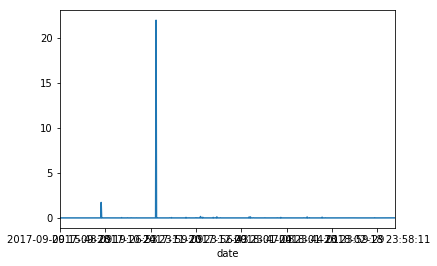

In [108]:
df['likes'] = df['likes'].astype(float)

# normalizing identity hate by tweet popularity
df['popular_obscene'] = df['obscene']*df['likes']
df.groupby('date')['popular_obscene'].mean().plot()

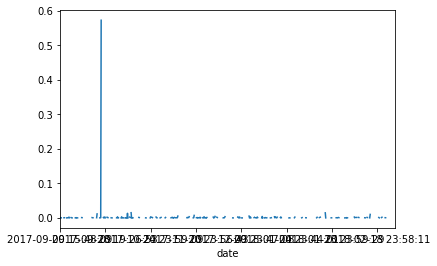

In [109]:
# normalizing identity hate by number of popular tweets
(df.groupby('date')['popular_obscene'].sum() / df.groupby('date')['likes'].sum()).plot()

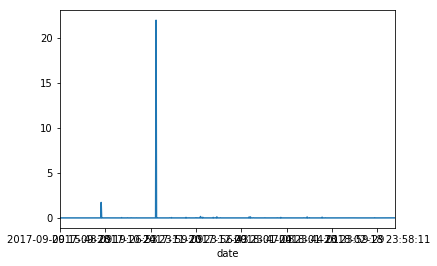

In [110]:
# normalizing popular tweets by number of popular tweets
(df.groupby('date')['popular_obscene'].sum() / df.groupby('date')['likes'].count()).plot()

In [238]:
df['text'] = df['text'].apply(str)


<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class